In [19]:

import pandas as pd
import numpy as np
from scipy import stats
import wquantiles
import statsmodels.api as sm

In [20]:
state = pd.read_csv('data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


#### Computing Mean, Median and Trimmed Mean of Population
Computing the mean, median and trimmed mean for the population, we get `{'mean': 6162876.3, 'median': 4436369.5, 'trimmed_mean': 4783697.125}`. The mean is larger than the trimmed mean which is larger than the median. This is because the trimmed mean removes the top and bottom 10% of the largest and smallest number of population.

In [21]:
mean = state['Population'].mean()
median = state['Population'].median()
trimmed_mean = stats.trim_mean(state['Population'], 0.1)
population = {"mean": mean,
"median": median,
"trimmed_mean": trimmed_mean}
population

{'mean': 6162876.3, 'median': 4436369.5, 'trimmed_mean': 4783697.125}

#### Computing Average Murder Rate of the Country
To calculate the average murder rate of the country we need to calculate the weighted mean or median to account for different population in different states.

In [22]:
weighted_mean = np.average(state['Murder.Rate'], weights=state["Population"])
weighted_median = wquantiles.median(state['Murder.Rate'], weights=state['Population'])
avg_murder_rate = {"weighted_mean": weighted_mean,
					"weighted_median": weighted_median}
avg_murder_rate

{'weighted_mean': 4.445833981123393, 'weighted_median': 4.4}

In [23]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


#### Variabality Estimates of State Population
- `std()` &rarr; gives the standard deviation of the population column.<br/>
- `iqr` &rarr; is the interquartile range which gives the standard deviation of middle 50% of the data.
$IQR=Q3-Q1$<br/>
- `robust.scale.mad()` &rarr; gives the **Median Absolute Deviation** as robust measure.

In [24]:
std = state['Population'].std()
iqr = state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
mad = sm.robust.scale.mad(state['Population'])
variability = {"std": std,
"iqr": iqr,
"mad": mad}
variability

{'std': 6848235.347401142, 'iqr': 4847308.0, 'mad': 3849876.1459979336}

##### Calculating the percentile of the dataset at [5%, 25%, 50%, 75%, 95%]

In [25]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

#### Boxplot of state Population

Text(0, 0.5, 'population(millions)')

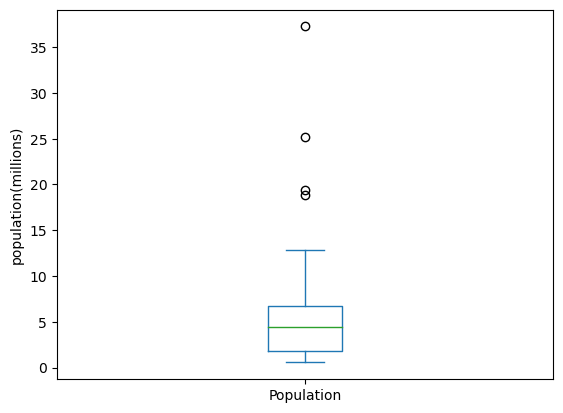

In [26]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel("population(millions)")

#### Frequency table
- `cut()` &rarr; creates specified number of range(bins) of data. In this case 10 different bins are created.<br/>
- `bins.value_counts()` &rarr; counts the number of data in each bin.

In [27]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()


(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

#### Histogram for the frequency table
- `df.plot.hist()` &rarr; plots the histogram

Text(0.5, 0, 'Population(millions)')

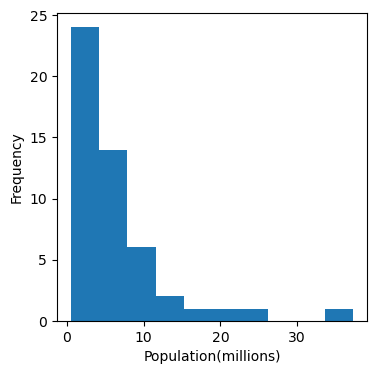

In [28]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel("Population(millions)")

#### Density Plots and Estimates
- `density` &rarr; instead of frequency density will be calculated<br/>
- `xlim` &rarr; range limit in x-axis<br/>
- `bins` &rarr; number of bins<br/>
- `density(ax=)` &rarr; axis argument which allows the plot to be added to the same graph 

Text(0, 0.5, 'Density')

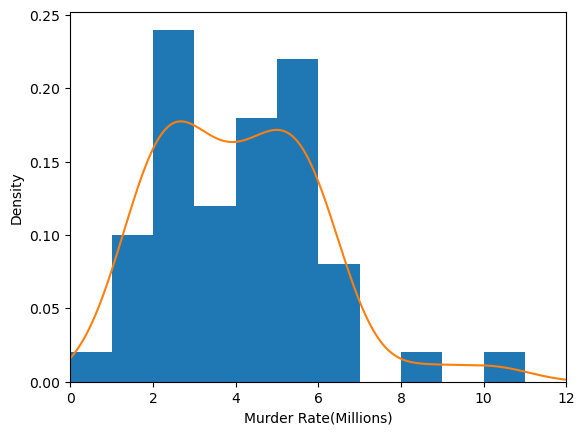

In [29]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(0,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel("Murder Rate(Millions)")
ax.set_ylabel("Density")


### Exploring Binary and Categorical Data

In [30]:
dfw = pd.read_csv('data/dfw_airline.csv')
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


#### Bar graph of the cause of delay in dfw airport.
- `transpose()` &#10230; transposes the dataframe like
$
\begin{bmatrix}
  a & b \\
  c & d \\
\end{bmatrix}
$
&rarr;
$
\begin{bmatrix}
  a & c \\
  b & d \\
\end{bmatrix}
$
with column name as index of the datapoint.


Text(0, 0.5, 'Count')

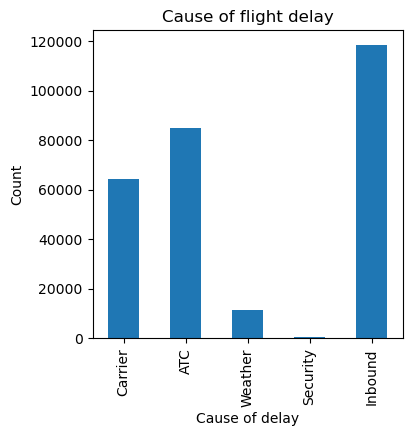

In [31]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False,  title="Cause of flight delay")
ax.set_xlabel("Cause of delay")
ax.set_ylabel("Count")

In [32]:
import seaborn as sns
sp500_px = pd.read_csv('data/sp500_data.csv.gz', index_col=0)
sp500_sym = pd.read_csv('data/sp500_sectors.csv')
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [33]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


#### Correlation 
##### Correlation between telecommunication stock returns
- `loc` &rarr; select data from a dataframe `df.loc[rows, columns]` where `columns` is optional.<br/>
In below code block we are selecting columns of `telecommunications_services` category

In [34]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000



correlation between the daily returns for major exchange-traded funds (ETFs)

<Axes: >

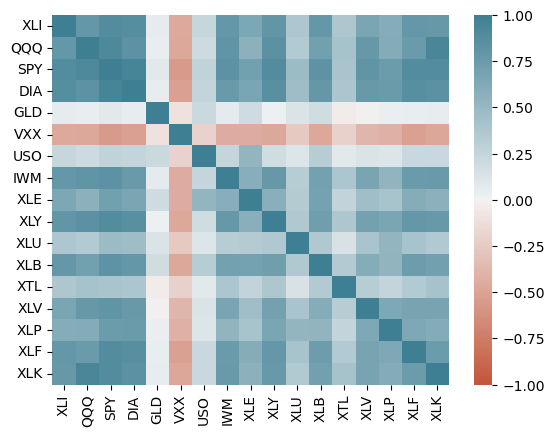

In [35]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

#### Scatter plot for the relationship between ATT and Verizon

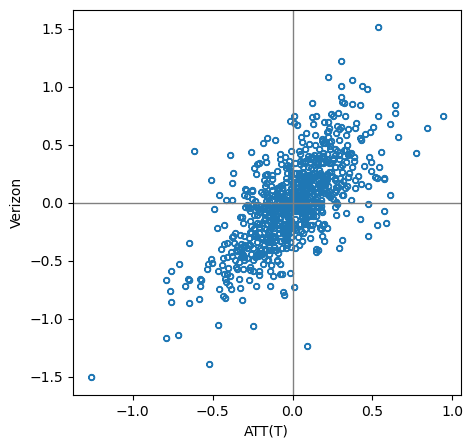

In [36]:
ax = telecom.plot.scatter(x="T", y='VZ', figsize=(5,5), marker='$\u25EF$')
ax.set_ylabel('Verizon')
ax.set_xlabel('ATT(T)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

### Hexagonal Binning

In [37]:
tax = pd.read_csv('data/kc_tax.csv.gz')
tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


#### Plotting numeric vs numeric data
- `tax0` &rarr; filtering the main part of the data by stripping very expensive and very small or large residences.<br/>
- `sharex=False` &rarr; If there were  multiple plots setting sharex=True will share the x-axis among every plot.


Text(0, 0.5, 'Tax Assessed Value')

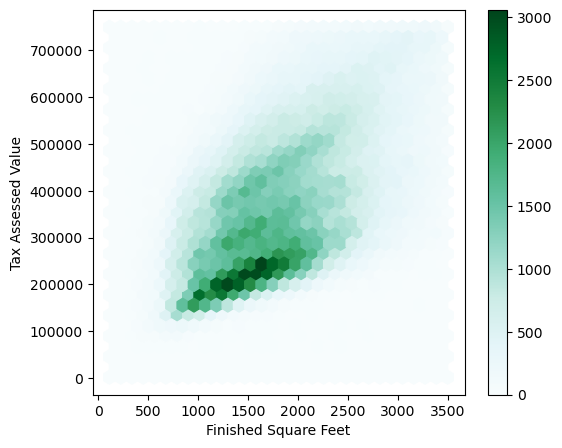

In [46]:
tax0 = tax.loc[(tax.TaxAssessedValue < 750000) & (tax.SqFtTotLiving > 100) & (tax.SqFtTotLiving < 3500),:]
ax = tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(6, 5))
ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax Assessed Value")